### Elastic seattlement problem

Solve the following beam:

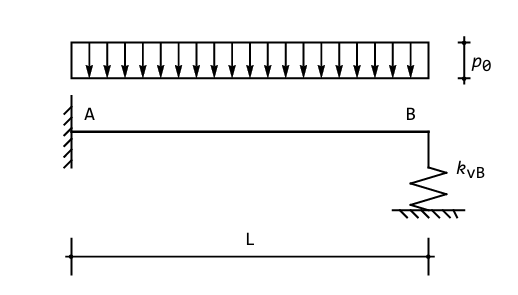

In [1]:
# Importing SymPy
import sympy as smp

In [2]:
# Define symbols
p0, L, kv, E, I = smp.symbols("p_0 L k_v E I", real = True, positive = True, constant = True)
z = smp.symbols("z", real = True)
uy = smp.Function("u_y", real = True)(z)

In [3]:
# Euler-Bernouilli differential equation
eq = smp.Eq(E * I * smp.diff(uy, z, 4), p0)
eq

Eq(E*I*Derivative(u_y(z), (z, 4)), p_0)

In [4]:
# General solution
sol = smp.dsolve(eq, uy)
sol

Eq(u_y(z), C1 + C2*z + C3*z**2 + C4*z**3 + p_0*z**4/(24*E*I))

In [5]:
# Setting up the boundary conditions
sol = sol.rhs

eq1 = smp.Eq(sol.subs(z, 0), 0) # u_y(0) = 0
eq2 = smp.Eq(smp.diff(sol, z, 1).subs(z, 0), 0) # phi'(0) = 0
eq3 = smp.Eq(smp.diff(sol, z, 2).subs(z, L), 0) # M(L) = 0
eq4 = smp.Eq(- E * I * smp.diff(sol, z, 3).subs(z, L) + kv * sol.subs(z, L), 0) # F(L) = R(L), where R(L) = kv * u_y(L)

eqs = [eq1, eq2, eq3, eq4]

In [6]:
# Finding the constants
C1 = sol.args[0]
C2 = sol.args[1] / z
C3 = sol.args[2] / z ** 2
C4 = sol.args[3] / z ** 3

unknowns = [C1, C2, C3, C4]

constants = smp.solve(eqs, unknowns)
constants

{C1: 0,
 C2: 0,
 C3: (12*E*I*L**2*p_0 + L**5*k_v*p_0)/(48*E**2*I**2 + 16*E*I*L**3*k_v),
 C4: (-24*E*I*L*p_0 - 5*L**4*k_v*p_0)/(144*E**2*I**2 + 48*E*I*L**3*k_v)}

In [7]:
# Final vertical displacement of the beam's line
sol = sol.subs(constants).simplify()
sol

p_0*z**2*(3*L**2*(12*E*I + L**3*k_v) - L*z*(24*E*I + 5*L**3*k_v) + 2*z**2*(3*E*I + L**3*k_v))/(48*E*I*(3*E*I + L**3*k_v))

In [8]:
# Angle
phi = - smp.diff(sol, z, 1).simplify()
phi

-p_0*z*(72*E*I*L**2 - 72*E*I*L*z + 24*E*I*z**2 + 6*L**5*k_v - 15*L**4*k_v*z + 8*L**3*k_v*z**2)/(48*E*I*(3*E*I + L**3*k_v))

In [9]:
# Bending moment
M = (E * I * smp.diff(phi, z, 1)).simplify()
M

p_0*(-12*E*I*L**2 + 24*E*I*L*z - 12*E*I*z**2 - L**5*k_v + 5*L**4*k_v*z - 4*L**3*k_v*z**2)/(8*(3*E*I + L**3*k_v))

In [10]:
# Shear force
F = smp.diff(M, z, 1).simplify()
F

p_0*(24*E*I*L - 24*E*I*z + 5*L**4*k_v - 8*L**3*k_v*z)/(8*(3*E*I + L**3*k_v))

**Let's start over with a triangular load on the beam:**

$$
    p(z) = p_0 \frac{z}{L} 
$$

In [11]:
# Euler-Bernouilli differential equation
eq = smp.Eq(E * I * smp.diff(uy, z, 4), p0 * z / L)
eq

Eq(E*I*Derivative(u_y(z), (z, 4)), p_0*z/L)

In [12]:
# General solution for a triangular load
sol = smp.dsolve(eq, uy)
sol

Eq(u_y(z), C1 + C2*z + C3*z**2 + C4*z**3 + p_0*z**5/(120*E*I*L))

In [13]:
# Setting up the boundary conditions
sol = sol.rhs

eq1 = smp.Eq(sol.subs(z, 0), 0) # u_y(0) = 0
eq2 = smp.Eq(smp.diff(sol, z, 1).subs(z, 0), 0) # phi'(0) = 0
eq3 = smp.Eq(smp.diff(sol, z, 2).subs(z, L), 0) # M(L) = 0
eq4 = smp.Eq(- E * I * smp.diff(sol, z, 3).subs(z, L) + kv * sol.subs(z, L), 0) # F(L) = R(L), where R(L) = kv * u_y(L)

eqs = [eq1, eq2, eq3, eq4]

# Finding the constants
C1 = sol.args[0]
C2 = sol.args[1] / z
C3 = sol.args[2] / z ** 2
C4 = sol.args[3] / z ** 3

unknowns = [C1, C2, C3, C4]

constants = smp.solve(eqs, unknowns)
constants

{C1: 0,
 C2: 0,
 C3: (120*E*I*L**2*p_0 + 7*L**5*k_v*p_0)/(720*E**2*I**2 + 240*E*I*L**3*k_v),
 C4: (-20*E*I*L*p_0 - 3*L**4*k_v*p_0)/(240*E**2*I**2 + 80*E*I*L**3*k_v)}

In [14]:
# Final vertical displacement of the beam's line for a triangular load
sol = sol.subs(constants).simplify()
sol

p_0*z**2*(L**3*(120*E*I + 7*L**3*k_v) - 3*L**2*z*(20*E*I + 3*L**3*k_v) + 2*z**3*(3*E*I + L**3*k_v))/(240*E*I*L*(3*E*I + L**3*k_v))

In [15]:
# Angle
phi = - smp.diff(sol, z, 1).simplify()
phi

-p_0*z*(240*E*I*L**3 - 180*E*I*L**2*z + 30*E*I*z**3 + 14*L**6*k_v - 27*L**5*k_v*z + 10*L**3*k_v*z**3)/(240*E*I*L*(3*E*I + L**3*k_v))

In [16]:
# Bending moment
M = (E * I * smp.diff(phi, z, 1)).simplify()
M

p_0*(-120*E*I*L**3 + 180*E*I*L**2*z - 60*E*I*z**3 - 7*L**6*k_v + 27*L**5*k_v*z - 20*L**3*k_v*z**3)/(120*L*(3*E*I + L**3*k_v))

In [17]:
# Shear force
F = smp.diff(M, z, 1).simplify()
F

p_0*(60*E*I*L**2 - 60*E*I*z**2 + 9*L**5*k_v - 20*L**3*k_v*z**2)/(40*L*(3*E*I + L**3*k_v))